# Data Analysis of the Titanic data set

### Questions to answer:
#### 1. What factors made people more likely to survive?
#### 2. How many passengers embarked on S,C or Q?
#### 3. How many passengers were male and female respectively?
#### 4. What was the minimum and maximum age of the passengers?
#### 5. What was the minimum, maximum and mean fare for traveling in Titanic?

#### We start by loading the data in a Pandas DataFrame.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading the data and cleanig it
titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### We can clearly see that 'Age', 'Cabin', 'Embarked' colums have missing values which needs to be handled. 
** Handling Missing values:** I am excluding the missing values because using the mean age would give me biased results.
We can observe some NaN values in the Age column of the original given titanic data. Also, not all cabin data is given in the data. Since we don't need cabin values in our analysis process, we simply remove that column.

In [11]:
# Counting the missing data 
missing_age_count = 0
for value in titanic_data['Age']:
    if pd.isnull(value):
        missing_age_count += 1
print "Number of Age data missing: ", missing_age_count

missing_cabin_count = 0
for value in titanic_data['Cabin']:
    if pd.isnull(value):
        missing_cabin_count += 1
print "Number of Cabin data missing: ", missing_cabin_count

emb = 0
for value in titanic_data['Embarked']:
    if pd.isnull(value):
        emb += 1
print "Number of Embarked data missing: ", emb

Number of Age data missing:  177
Number of Cabin data missing:  687
Number of Embarked data missing:  2


#### It is observed that there are 177 missing Age values, 687 missing cabin values and 2 missing embarked values in the data. In the data wrangling process, the rows which contain NaN values in the 'Age' column and 'Embarked' are removed in order to clean the data. Also, the cabin column is simply removed because we don't need the cabin data for our analysis.

In [12]:
# Dropping the Nan values in 'Age' column and 'Embarked' columns
clean_data = titanic_data.dropna(subset=['Age','Embarked'])

# Since we don't need 'Cabin' column, we are removing it
new_data = clean_data.drop('Cabin', axis = 1)

#Finding the number of survivors
survivors = new_data.loc[new_data['Survived'] == 1]
survivors.info()

# The index of the data is reset
new_data = new_data.reset_index()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 1 to 889
Data columns (total 11 columns):
PassengerId    288 non-null int64
Survived       288 non-null int64
Pclass         288 non-null int64
Name           288 non-null object
Sex            288 non-null object
Age            288 non-null float64
SibSp          288 non-null int64
Parch          288 non-null int64
Ticket         288 non-null object
Fare           288 non-null float64
Embarked       288 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 27.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
index          712 non-null int64
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object


#### The data is cleaned as per our requirements. The rows with missing age values and embarked values are removed and the cabin values are also removed. Then, I have reset the index of the data. I am not using PassengerId, SibSp, Parch and Ticket colums in the analysis because no important conclusions can be drawn from them.

Passengers from S :  554
Passengers from C :  130
Passengers from Q :  28


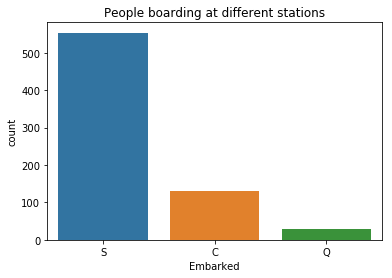

In [13]:
# Number of people embarked
# on S, C and Q.
S_list = []
C_list = []
Q_list = []

# Loop to find the number of people boarding at different stations
for value in new_data['Embarked']:
    if value == 'S':
        S_list.append(value)
    elif value == 'C':
        C_list.append(value)
    elif value == 'Q':
        Q_list.append(value)

print "Passengers from S : ", len(S_list)
print "Passengers from C : ", len(C_list)
print "Passengers from Q : ", len(Q_list)
embark_plot = sns.countplot(data=new_data, x='Embarked')
embark_plot.set_title("People boarding at different stations")

#### In this step, passengers boarding at different stations are analyzed. This will give us a sense about where most of the people boarded. 
#### This shows that there were most passengers from S followed by C and Q.

Total number of male passengers:  453
Total female Passengers:  259


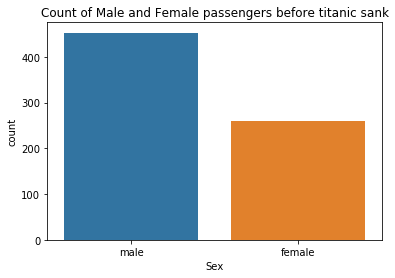

In [14]:
# Finding the total number of female and male passengers
female = 0
male = 0
total_passengers = len(new_data)
for people in new_data['Sex']:
    if people == 'female':
        female += 1
    elif people == 'male':
        male += 1
print "Total number of male passengers: ", male
print "Total female Passengers: ", female
sex_plot = sns.countplot(x="Sex", data=new_data)
sex_plot.set_title("Count of Male and Female passengers before titanic sank")


#### The plot shows the total number of male and female passengers on board. This shows that there are more male passengers than female passengers before the titanic sank.

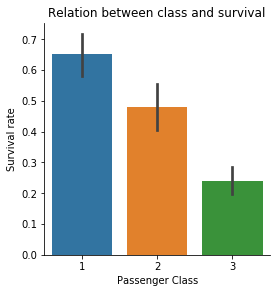

In [32]:
# Plot to show relation between Passenger class and passengers who survived
cls_sur_plot = sns.factorplot('Pclass','Survived', data = new_data, kind='bar')
cls_sur_plot.set(xlabel="Passenger Class", ylabel="Survival rate", title = "Relation between class and survival")

#### This plot shows the relation between the people who survived and the class they travelled in. This shows that the passengers traveling in class 1 survived the most.

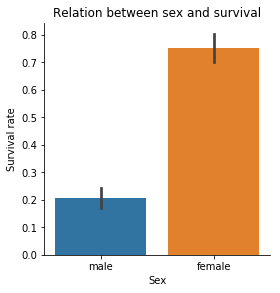

In [33]:
# Plot to show who(male/female) survived the most
sex_sur_plot = sns.factorplot('Sex', 'Survived', data=new_data, kind='bar')
sex_sur_plot.set(xlabel="Sex", ylabel="Survival rate", title = "Relation between sex and survival")

#### To know whether the sex of the passenger was related to their survival, we plot the data.
#### This plot shows the relation between the sex of the passengers and survival. It shows that female passengers survived more than male passengers. Rather, the number of females outnumbered the males by a huge difference after the titanic sank.

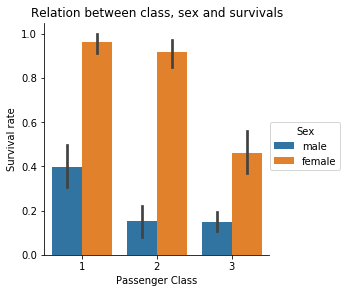

In [30]:
# Plot to show who(male/female) and in which class survived the most
cls_sex_sur_plot = sns.factorplot('Pclass', 'Survived', hue='Sex', data=new_data, kind='bar')
cls_sex_sur_plot.set(xlabel="Passenger Class", ylabel="Survival rate", title = "Relation between class, sex and survivals")


#### This plot is plotted to show the relation between the variables sex, class and survival.
#### This plot shows the relation between the sex, class and survivals of the passengers. It shows that female passengers were saved before male passengers and upper class passengers were preferred over lower class passengers.

Max age of the passengers:  80
Min age of the passengers:  0


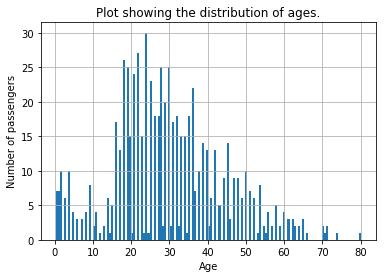

In [22]:
# Showing the minimum and maximum fare
# and the min and max ages of the passengers

max_age = int(new_data['Age'].max())
min_age = int(new_data['Age'].min())
print "Max age of the passengers: ", max_age
print "Min age of the passengers: ", min_age

age_plot = new_data['Age'].hist(bins=150)
age_plot.set_title("Plot showing the distribution of ages.")
age_plot.set_xlabel("Age")
age_plot.set_ylabel("Number of passengers")

#### This shows that most of the passengers were from the mid-age group. The oldest passenger was 80 years old and the youngest was few months old. Here, I have considered integral values of ages only. 

In [23]:
max_fare = new_data['Fare'].max()
min_fare = new_data['Fare'].min()
mean_fare = new_data['Age'].mean()
print "Min fare of Titanic: ", min_fare
print "Max fare of Titanic: ", max_fare
print "Mean fare of the Titanic: ", mean_fare

Min fare of Titanic:  0.0
Max fare of Titanic:  512.3292
Mean fare of the Titanic:  29.6420926966


#### The maximum fare of the Titanic was \$512.3292 and minumum fare was \$0.0 (They may have not charged for infants). The mean fare was \$29.70.

In [26]:
# This code finds male and female survivors of different classes.
# The result is stored in a Data frame called class_survivors.

fc1_survivors = 0
fc2_survivors = 0
fc3_survivors = 0
mc1_survivors = 0
mc2_survivors = 0
mc3_survivors = 0

# Loop to find survivors of different class
# to check whether most of the survivors
# were from upper classes.

for index, row in survivors.iterrows():
    if row['Sex'] == 'female':
        if row['Pclass'] == 1:
            fc1_survivors += 1

        elif row['Pclass'] == 2:
            fc2_survivors += 1

        elif row['Pclass'] == 3:
            fc3_survivors += 1

    elif row['Sex'] == 'male':
        if row['Pclass'] == 1:
            mc1_survivors += 1

        elif row['Pclass'] == 2:
            mc2_survivors += 1

        elif row['Pclass'] == 3:
            mc3_survivors += 1

class_survivors = {
    'Male Survivors by class(1-3)':
        [mc1_survivors, mc2_survivors, mc3_survivors],
    'Female Survivors by class(1-3)':
        [fc1_survivors, fc2_survivors, fc3_survivors]
}

People on board:  712
People survived:  288
Male Survivors:  93
Female Survivors:  195
{'Male Survivors by class(1-3)': [40, 15, 38], 'Female Survivors by class(1-3)': [80, 68, 47]}


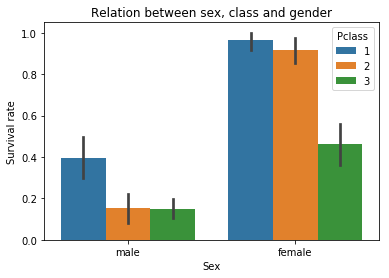

In [34]:

female_survivors = 0
male_survivors = 0
total_survivors = len(survivors)
for people in survivors['Sex']:
    if people == 'female':
        female_survivors = female_survivors + 1
    elif people == 'male':
        male_survivors = male_survivors + 1

print "People on board: ", len(new_data['Age'])
print "People survived: ", len(survivors['Age'])
print "Male Survivors: ", male_survivors
print "Female Survivors: ", female_survivors
print class_survivors

# Plots showing the Passenger Class, Sex and survival
class_sex_sur_plot = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=new_data)
class_sex_sur_plot.set(xlabel="Sex", ylabel="Survival rate", title='Relation between sex, class and gender');

#### The plot is showing that there were more female survivors than male survivors and in those survivors, most of the survivors from both the genders were from class 1 or upper class. It can be infered that women were tried to save first and first class passengers were preferred over others.

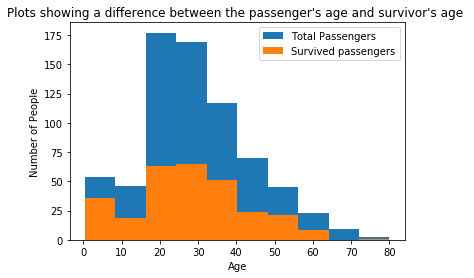

In [44]:
passenger_plot = plt.hist(new_data['Age'],label='Total Passengers')
survivor_plot = plt.hist(survivors['Age'],label = 'Survived passengers')
plt.title('Plots showing a difference between the passenger\'s age and survivor\'s age ');
plt.xlabel('Age');
plt.ylabel('Number of People');
plt.legend(loc='upper right')

#### This plot shows that the difference between the passengers and survivors is least in the age group of 0-10. This shows that children were tried to save first.

## Conclusions

### Based on the above analysis, I can conclude that-
1. Most people boarded from S.
2. There were 453 male passengers and 259 female passengers.
3. Most of the survivors were passengers traveling in class-1, therefore upper class people were saved before lower class people when the titanic sank.
4. Female survivors outnumber the male survivors by a huge difference, therefore female passengers were saved before the male passengers.
5. Most of the survivors are females from the first class followed by females from the lower classes and then the males from upper class to lower class, therefore it can be infered that females were given first preference and upper class passengers were saved before the lower class passengers.
6. 288 people out of the 712 people survived. 195 female survivors and 93 male survivors.
7. The difference in number of passengers and survivors is least in the age group of 0-10, therefore more children were saved than the adults.
8. To travel in a titanic, the maximum fare was \$512.3292 and minumum fare was \$0.0 (They may have not charged for infants). The mean fare was \$29.70.
9. The titanic consisted people from a few months old(age=0) to 80 years of age.

### Limitations of the Analysis

1. The above findings are only based on the given dataset. Just because I can correlate the survival factors with the data does not mean that those factors actually influenced the survival. Correlation does not imply causation.
2. The given data is a sample and not a population so the observations may not be accurate.
3. There are variables which I did not choose to analyze. Those may also have affected the survival rate.
4. Handling Missing Values: There were values that were missing which has been excluded from the dataset. Therefore, the analysis cannot be true since a lot of sample data is missing. As the sample is made much smaller, the observations may be far from the observations made from population.
5. Some passengers may have died later due to injuries which has not been mentioned. This affects our observation by giving false data.

### References

https://Stackoverflow.com

https://guides.github.com/features/mastering-markdown/

https://seaborn.pydata.org/

https://pandas.pydata.org

http://matplotlib.org/

https://in.udacity.com/